In [5]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

In [6]:
# Search for your target using its TIC ID 
TIC = 'TIC 180672438' 

In [9]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC, author='SPOC');

In [10]:
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 49,2022,SPOC,120,180672438,0.0


In [11]:
# Select multiple sectors based on the available data above.
sector1b = lk.search_lightcurve(TIC, sector=49).download();
sector1 = sector1b.PDCSAP_FLUX.remove_nans();

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Temp\ipykernel_7772\1275967896.py:3: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  sector1 = sector1b.PDCSAP_FLUX.remove_nans();


In [12]:
sector2b = lk.search_lightcurve(TIC, sector=49).download();
sector2 = sector2b.PDCSAP_FLUX.remove_nans();

C:\Users\Nick Landing\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightkurve\search.py:414: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
C:\Users\Nick Landing\AppData\Local\Temp\ipykernel_7772\220339663.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  sector2 = sector2b.PDCSAP_FLUX.remove_nans();


<IPython.core.display.Javascript object>


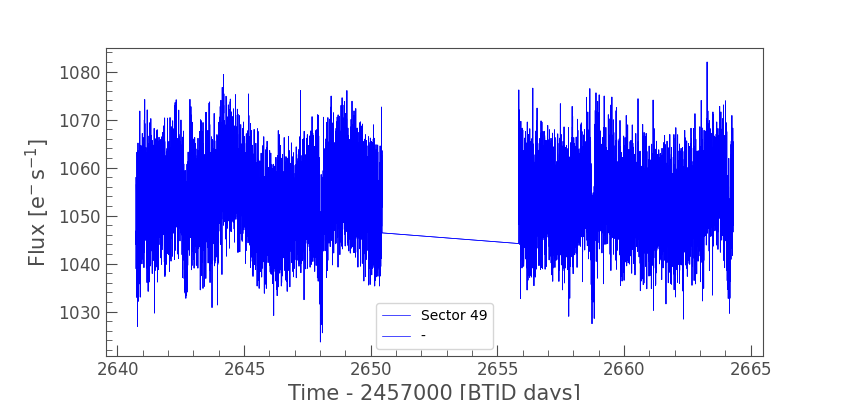

In [13]:
# Plot the light curves with the desired colors and highlighted sectors
ax = sector1.plot(label='Sector 49', color='blue');
sector2.plot(ax=ax, label = '-', color='blue');
ax.legend();

In [14]:
collect_lc = lk.LightCurveCollection([sector2, sector1]).stitch();

<IPython.core.display.Javascript object>


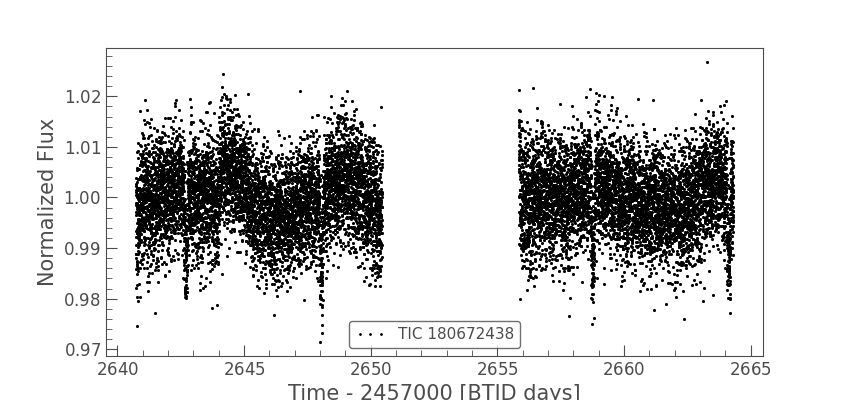

In [15]:
collect_lc.plot(color = 'black', lw = 0, marker = '.');

<IPython.core.display.Javascript object>


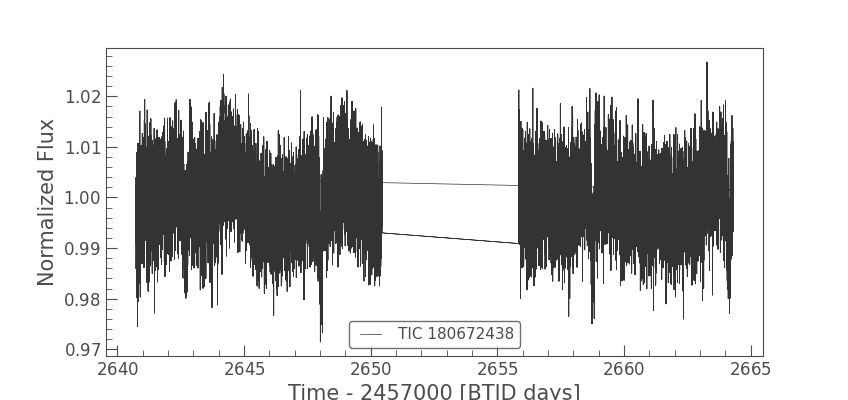

<IPython.core.display.Javascript object>


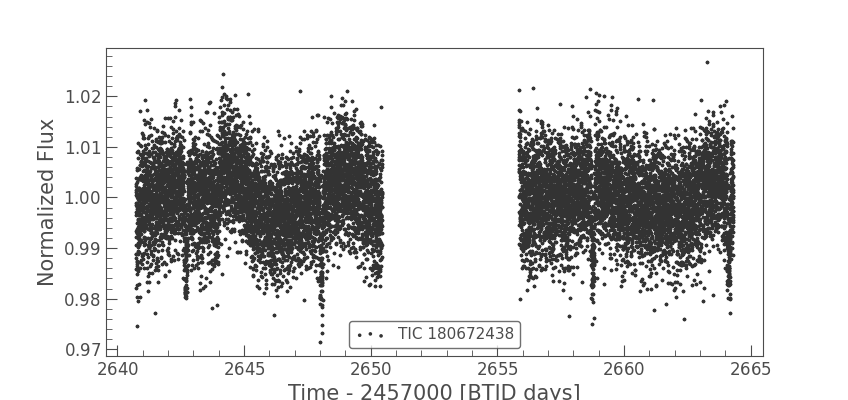

In [16]:
mask = (collect_lc.time.value < 2665)&(collect_lc.time.value > 2640)
masked_lc=collect_lc[mask];
masked_lc.plot();
masked_lc.scatter(s=10);

<IPython.core.display.Javascript object>


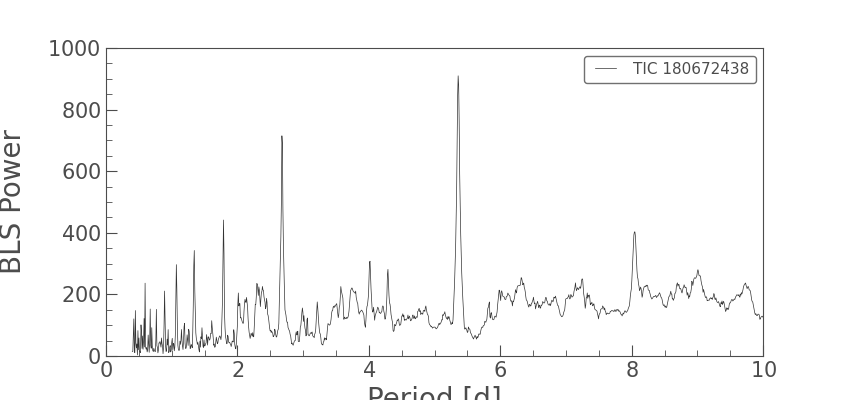

Period at max power = 5.358305583055831 d
BLS max power = 14.36441653842778
----------------------------------------
Period at second max power = 5.366101661016611 d
BLS max power = 15.058942672345621
----------------------------------------
Period at third max power = 5.350509505095052 d
BLS max power = 68.79598265356904
----------------------------------------
Period at fourth max power = 5.37389773897739 d
BLS max power = 120.53811748312728
----------------------------------------
Period at fifth max power = 2.6764547645476453 d
BLS max power = 13.357833230673398
----------------------------------------
Period at sixth max power = 2.6842508425084253 d
BLS max power = 10.94346552986213
----------------------------------------
Period at seventh max power = 5.342713427134272 d
BLS max power = 147.65305413166965
----------------------------------------
Period at eighth max power = 5.38169381693817 d
BLS max power = 42.132128716088324
----------------------------------------
Period at ni

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 780, 100000)
bls = masked_lc.to_periodogram(method='bls', period=period)

# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 10)
plt.ylim([0, 1000])

# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]

# Print the periods and powers of the highest and second highest peaks
#Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
print('Period at max power =', periods[np.argmax(powers)])
print('BLS max power =', np.max(powers[0]))
print('----------------------------------------')
print('Period at second max power =', sorted_periods[1])
print('BLS max power =', np.max(powers[1]))
print('----------------------------------------')
print('Period at third max power =', sorted_periods[2])
print('BLS max power =', np.max(powers[2]))
print('----------------------------------------')
print('Period at fourth max power =', sorted_periods[3])
print('BLS max power =', np.max(powers[3]))
print('----------------------------------------')
print('Period at fifth max power =', sorted_periods[4])
print('BLS max power =', np.max(powers[4]))
print('----------------------------------------')
print('Period at sixth max power =', sorted_periods[5])
print('BLS max power =', np.max(powers[5]))
print('----------------------------------------')
print('Period at seventh max power =', sorted_periods[6])
print('BLS max power =', np.max(powers[6]))
print('----------------------------------------')
print('Period at eighth max power =', sorted_periods[7])
print('BLS max power =', np.max(powers[7]))
print('----------------------------------------')
print('Period at ninth max power =', sorted_periods[8])
print('BLS max power =', np.max(powers[8]))
print('----------------------------------------')

<IPython.core.display.Javascript object>


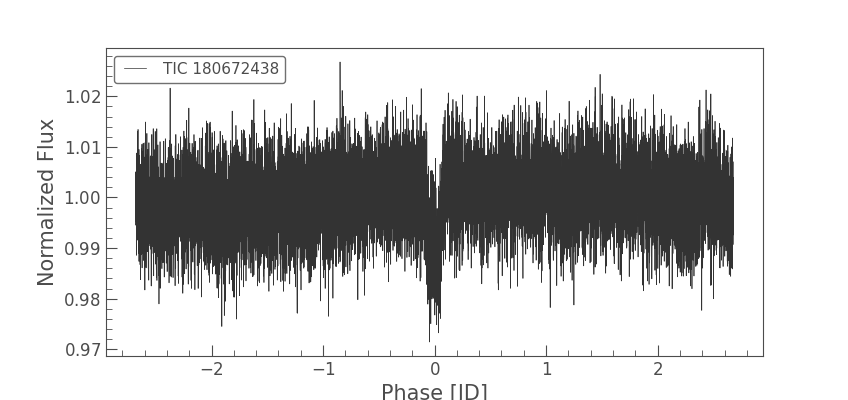

<IPython.core.display.Javascript object>


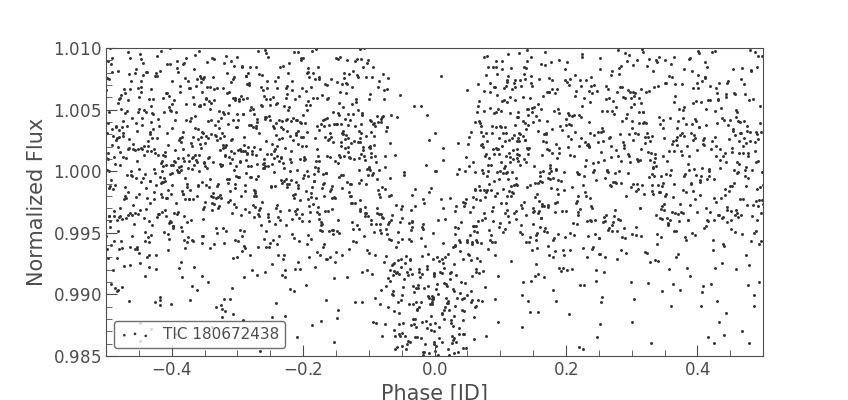

(0.985, 1.01)

In [22]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
folded_lc = masked_lc.fold(bls.period_at_max_power, epoch_time=bls.transit_time_at_max_power)
folded_lc.plot();
folded_lc.scatter(s=3)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.5,0.5)
plt.ylim([0.985,1.01])

<IPython.core.display.Javascript object>


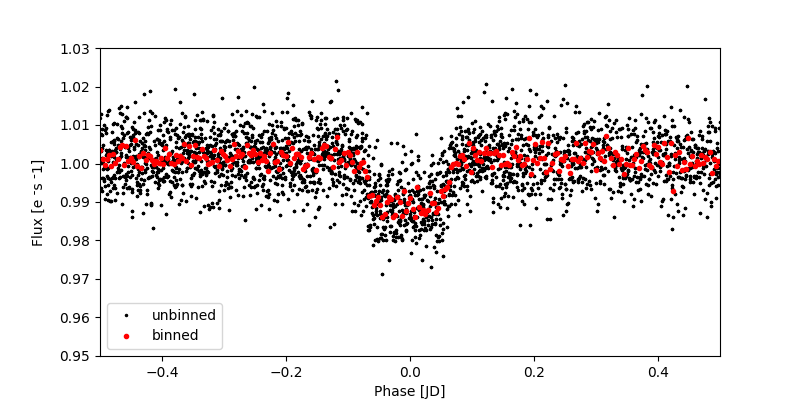

(0.95, 1.03)

In [23]:
period  = bls.period_at_max_power
t0 = bls.transit_time_at_max_power 

folded2_lc = masked_lc.fold(bls.period_at_max_power, epoch_time=bls.transit_time_at_max_power)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-0.5,0.5)
plt.ylim([0.95,1.03])

In [24]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  0.9859884977340698
median flux = 1.000110149383545
Tdepth =  0.014121651649475098
Tdepth in ppm =  14121.651649475098 ppm
Rp/Rs ratio =  0.11883455578860509


In [25]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [26]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 3.5999999999999996 d hours


In [27]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  0.00929489299181145
depth in ppm = 9294.89299181145 ppm


In [28]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

5.358305583055831 d
2642.6968652559517
0.15 d


In [29]:
P = 5.950807508075081 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.08 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 9863919468.920214 m
a = 9863919.468920214 km
a = 0.06593622785099097 AU
The planetary mass was neglected


In [30]:
L = 1.217183 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 1.0519172971293893 AU
The outer boundary of the habitable zone ro = 1.5154443896472107 AU


In [31]:
Rs = 1.0442 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 86406.77163017768 km
Rp= 13.562513205176218 Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 13.565771134704953


In [32]:
P = 3.8770507705077053 * 24 * 60 * 60
pi = math.pi
a = 9863919468.920214 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 185018.0739547936 m/s


In [33]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  5.358305583055831 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  3.5999999999999996 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  0.014121651649475098
Transit depth in ppm =  14121.651649475098 ppm
Transit Depth from bls model in ppm = 9294.89299181145 ppm
Rp/Rs ratio =  0.11883455578860509
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 86406.77163017768 km
Rp= 13.562513205176218 Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 9863919468.920214 m
a = 9863919.468920214 km
a = 0.06593622785099097 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 13.565771134704953
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 185018.0739547936 m/s
- - - - - - - - - - - - - - - - - - - - 


In [34]:
import cmath
#Calculation of total transit duration Tt
Tt = ((((4 * period **(2) * Tdepth ** (1/2))/(math.pi ** 2)) * (((Rs*Rsun)/(a/1000))**(2))) + (planet_b_dur ** (2))) ** (1/2)
print('Total transit duration T14 Tt =', Tt)
print('Tt in hours =', Tt * 24, 'hours')
#Calculation of the impact parameter b for eccentricity e=0
#b = (( ((1-(Tdepth **(1/2)))**(2)-(planet_b_dur/Tt)**(2))* (1+(Tdepth **(1/2)))**(2)  ) / (1 - (planet_b_dur/Tt)**(2) ) ) ** (1/2)
b = abs(( ((1-cmath.sqrt(Tdepth))**(2)-(planet_b_dur/Tt)**(2)) * (1+cmath.sqrt(Tdepth))**(2)  ) / cmath.sqrt(1 - (planet_b_dur/Tt)**(2) ))
print('Impart parameter b =', b)
#Calculation of inclination
i = cmath.acos(b*(Rs*Rsun)/(a/1000))
print('Inclination i =', 90-i, 'deg')

Total transit duration T14 Tt = 0.17324538000419748 d
Tt in hours = 4.157889120100739 d hours
Impart parameter b = 0.06705276963959564
Inclination i = (88.43414648419657+0j) deg


In [35]:
lk.show_citation_instructions()